# Single Impurity Anderson Model
______________________________


We use the fermionic chain mapping proposed in [1] to perform tensor network simulations of the Single Impurity Anderson Model (SIAM). The SIAM Hamiltonian is defined as:
\begin{equation}
    \hat H^\text{SIAM}  = \hat H_\text{loc} + \hat H_\text{hyb} + \hat H_\text{cond} = \overbrace{\epsilon_d \hat d^\dagger \hat d}^{\hat H_\text{loc}} + \underbrace{\sum_{k} V_k \Big( \hat d^\dagger \hat c_k + \hat c_k^\dagger \hat d \Big)}_{H_\text{hyb}} + \underbrace{\sum_k \epsilon_k \hat c_k^\dagger \hat c_k}_{H_I^\text{chain}}.
\end{equation}
All of the operators obey to the usual fermionic anti-commutation relations: $\{\hat c_i, \hat c_j^\dagger \} = \delta_{ij}$, $\{\hat c_i, \hat c_j \} =\{\hat c_i^\dagger, \hat c_j^\dagger \} =0$ $\forall i,j$. The chain mapping is based on a thermofield-like transformation [2], performed with fermions: ancillary fermionic operators $\hat c_{2k}$ are defined, one for each of the original fermionic modes $\hat c_{1k}$. A Bogoliubov transformation is then applied, so that two new fermionic modes $\hat f_{1k}$ and $\hat f_{2k}$ are defined as a linear combination of $\hat c_{1k}$ and $\hat c_{2k}$. Two chains are defined: the chain labelled $1$ for the empty modes, the chain labelled $2$ for the filled modes.
The following relations are used to define the functions equivalent to the spectral density of the bosonic case, one for each chain:
\begin{equation}
\begin{split}
   &V_{1k} = V_{k} \sin \theta_k = \sqrt{\frac{1}{e^{\beta \epsilon_k}+1}} \\
   &V_{2k} = V_{k} \cos \theta_k = \sqrt{\frac{1}{e^{-\beta \epsilon_k}+1}}, 
\end{split}
\end{equation}    
where we choose the spectral function that characterizes the fermionic bath to be: $V_k= \sqrt{1-k^2}$, and we define the dispersion relation as: $e_k = k$, that is, a linear dispersion relation with propagation speed equal to $1$. This latter choice corresponds to a model of metals (gapless energy spectrum). We select a filled state as the initial state of the defect.
Using the mapping proposed in [1], the chain Hamiltonian becomes:
\begin{equation}\label{chain_ham_siam}
    \begin{split}
    \hat H^\text{chain}  = \hat H_\text{loc} &+ \sum_{i = \{1,2\}}\bigg[ J_{i,0} \Big(\hat d^\dagger \hat a_{i,0} + \hat d \hat a_{i,0}^\dagger \Big) + \\ &+ \sum_{n=1}^\infty  \Big( J_{i,n} \hat a_{i,n}^\dagger \hat a_{i,n-1} +  J_{i,n} \hat  a_{i,n-1}^\dagger \hat a_{i,n} \Big) + \sum_{n=0}^\infty E_{i,n} \hat  a_{i,n}^\dagger \hat a_{i,n} \bigg],
    \end{split}
\end{equation}
where the $J_{i,n}$ coefficients are the couplings between the chain sites and the $E_{i,n}$ coefficients are the energies associated to each chain site. Clearly, the interactions are between nearest neighbors. This, combined with the fact that the fermions in our model are spinless, enables a straightforward mapping into fermionic operators of the bosonic creation and annihilation operators, that on their part obey to the bosonic commutation relations: $[\hat b_i, \hat b_j^\dagger] = \delta_{ij}$, $[\hat b_i, \hat b_j] =[\hat b_i^\dagger, \hat b_j^\dagger] =0$ $\forall i,j$. The mapping derived from Jordan-Wigner transformations for spinless fermions is:
\begin{equation}
    \hat a_{i}^\dagger \hat a_{i+1} + \hat a_{i+1}^\dagger \hat a_{i} = \hat b_{i}^\dagger \hat b_{i+1} + \hat b_{i+1}^\dagger \hat b_{i}.  
\end{equation}


## Double chain mapping

The corresponding MPO representation is:
\begin{equation}
\begin{split}
&
\begin{bmatrix}
 \hat{\mathbb I} & J_{2,N} \hat b_{2,N}^\dagger & J_{2,N} \hat b_{2,N} & E_{2,N} \hat b_{2,N}^\dagger \hat b_{2,N} 
\end{bmatrix}\cdot ... \cdot
\begin{bmatrix}
 \hat{ \mathbb I} & J_{2,0} \hat b_{2,0}^\dagger & J_{2,0} \hat b_{2,0} & E_{2,0} \hat b_{2,0}^\dagger \hat b_{2,0}\\
0 &0 & 0 & \hat b_{2,0} \\
0 &0 & 0 & \hat b_{2,0}^\dagger \\
0 &0 & 0 & \hat{\mathbb I}
\end{bmatrix}
\cdot \\ \cdot &
\begin{bmatrix}
 \hat{ \mathbb I} & \hat d^\dagger & \hat d & \epsilon_d \hat d^\dagger \hat d\\
0 &0 & 0 & \hat d \\
0 &0 & 0 & \hat d^\dagger \\
0 &0 & 0 & \hat{\mathbb I}
\end{bmatrix}
\cdot 
\begin{bmatrix}
 \hat{ \mathbb I} & \hat b_{1,0}^\dagger & \hat b_{1,0} & E_{1,0} \hat b_{1,0}^\dagger \hat b_{1,0}\\
0 &0 & 0 & \hat J_{1,0}b_{1,0} \\
0 &0 & 0 & \hat J_{1,0}b_{1,0}^\dagger \\
0 &0 & 0 & \hat{\mathbb I}
\end{bmatrix}
\cdot  ... \cdot
\begin{bmatrix}
 E_{2,N} \hat b_{2,N}^\dagger \hat b_{2,N} \\ J_{2,N} \hat b_{2,N} \\ J_{2,N} \hat b_{2,N}^\dagger \\ \hat{\mathbb I}
\end{bmatrix}
\end{split}
\end{equation}

The system starts from a filled state, the chain starts as in the Fermi sea.

## Interleaved chain mapping

The drawback of such a representation though, is that the particle-hole pairs are spatially separated in the MPS, creating correlations and therefore leading to a dramatic increase in the bond dimensions. This is why Kohn and Santoro propose an interleaved geometry, the advantages of which are thoroughly explained in \cite{Kohn_Santoro_2021b}. Exploiting the interleaved representation, the interaction comes to be between next-nearest neighbors: a string operator appears in the Jordan-Wigner transformation from bosons to fermions:
\begin{equation}
    \hat a_{i}^\dagger \hat a_{i+2} + \hat a_{i+2}^\dagger \hat a_{i} = \hat b_{i}^\dagger \hat F_{i+1} \hat b_{i+2} + \hat b_{i} \hat F_{i+1} \hat b_{i+2}^\dagger,
\end{equation}
where the string operator $\hat F_i$ is defined as: $\hat F_i = (-1)^{\hat n_i} = \hat{\mathbb I} -2 \hat n_i = \hat{\mathbb I}-2 \hat b_i^\dagger \hat b_i$. It is possible to find the analytical form also for MPOs with long range interaction \cite{mpo}. In the case of next-nearest neighbors interactions between spinless fermions, the MPO representation will require a bond dimension $\chi=6$. We explicitly write it as:
\begin{equation}
\begin{split}
&
\begin{bmatrix}
 \hat{\mathbb I} & \hat d & \hat d^\dagger & 0 & 0 & E_{d} \hat d^\dagger \hat d 
\end{bmatrix}\cdot
\begin{bmatrix}
 \hat{ \mathbb I} & \hat b_{2,0} & \hat b_{2,0}^\dagger & 0 & 0 & E_{2,0} \hat b_{2,0}^\dagger \hat b_{2,0}\\
0 &0 & 0 & \hat{F}_{2,0} & 0 & J_{2,0} \hat b_{2,0}^\dagger \\
0 &0 & 0 & 0 & \hat{F}_{2,0} & J_{2,0} \hat b_{2,0} \\
0 &0 & 0 & 0 & 0 &  0\\
0 &0 & 0 & 0 & 0 & 0 \\
0 &0 & 0 & 0 & 0 & \hat{\mathbb I}
\end{bmatrix}
\cdot \\ \cdot &
\begin{bmatrix}
 \hat{ \mathbb I} & \hat b_{1,0} & \hat b_{1,0}^\dagger & 0 & 0 & E_{1,0} \hat b_{1,0}^\dagger \hat b_{1,0}\\
0 &0 & 0 & \hat{ F}_{1,0} & 0 & 0 \\
0 &0 & 0 & 0 & \hat{F}_{1,0} & 0 \\
0 &0 & 0 & 0 & 0 & J_{1,0} \hat b_{1,0}^\dagger \\
0 &0 & 0 & 0 & 0 & J_{1,0} \hat b_{1,0} \\
0 &0 & 0 & 0 & 0 & \hat{\mathbb I}
\end{bmatrix}
\cdot ... \cdot 
\begin{bmatrix}
 \hat{ \mathbb I} & \hat b_{2,N} & \hat b_{2,N}^\dagger & 0 & 0 & E_{2,N} \hat b_{2,N}^\dagger \hat b_{2,N}\\
0 &0 & 0 & \hat{F}_{2,N} & 0 & 0 \\
0 &0 & 0 & 0 & \hat{F}_{2,N} & 0 \\
0 &0 & 0 & 0 & 0 & J_{2,N} \hat b_{2,N}^\dagger \\
0 &0 & 0 & 0 & 0 & J_{2,N} \hat b_{2,N} \\
0 &0 & 0 & 0 & 0 & \hat{\mathbb I}
\end{bmatrix}
\cdot \\ \cdot &
\begin{bmatrix}
 E_{1,N} \hat b_{1,N}^\dagger \hat b_{1,N} \\ 0 \\0 \\ J_{1,N} \hat b_{1,N}^\dagger \\ J_{1,N} \hat b_{1,N} \\ \hat{\mathbb I}
\end{bmatrix} 
\end{split}
\end{equation}
________________
### References

[1] Lucas Kohn and Giuseppe E. Santoro. Efficient mapping for anderson impurity problems with matrix product states. Physical Review B, 104(1):014303, Jul 2021. arXiv: [2012.01424](https://arxiv.org/abs/2012.01424).


[2] Ines de Vega and Mari-Carmen Banuls. Thermofield-based chain mapping approach for open quantum systems. Physical Review A, 92(5):052116, Nov 2015. arXiv:[1504.07228](https://arxiv.org/abs/1504.07228).

[3] L. Kohn and G. E. Santoro. Quenching the anderson impurity model at finite temperature: Entanglement and bath dynamics using matrix product states. arXiv:2107.02807 [cond-mat, physics:quant-ph], Jul 2021. arXiv: [2107.02807](https://arxiv.org/abs/2107.02807)

In [29]:
import h5py
import numpy as np
#import cmath for complex number operations
import cmath
import matplotlib
import matplotlib.pyplot as pl
import matplotlib.style as style 
import matplotlib.pyplot as pl
import scipy.misc
from scipy import ndimage

from scipy.optimize import curve_fit
style.use('tableau-colorblind10')
matplotlib.rcParams.update({'font.size': 12})

In [90]:
def system(tit, res, times):
    f = pl.figure(figsize=(6, 4))
    pl.plot(times, res, '-o', markersize="4")
    pl.xlabel(r"$t$")
    pl.ylabel(r'$\langle \hat n_{d} \rangle$', fontsize=14)
    pl.ylim((0,1))
    pl.title(tit)
    pl.grid()

In [39]:
def occupation(res, times, chain):
    f, ax = pl.subplots(figsize=(7,5))
    img = ax.imshow(res.T, cmap='Blues', interpolation='nearest', extent=[-1,1,-1,1], origin='lower')

    y_label_list = times
    x_label_list = chain

    ax.set_yticks([-1.0, -0.5, 0, 0.5, 1.0])
    ax.set_xticks([-1.0, -0.5, 0, 0.5, 1.0])

    ax.set_yticklabels(y_label_list)
    ax.set_xticklabels(x_label_list)

    ax.set_ylabel("$t$")
    ax.set_xlabel("$N_{i,j}$ chain sites")
    
    pl.title("Chain occupation")
    f.colorbar(img)

In [32]:
def bonddim(res, times, chain):
    f, ax = pl.subplots(figsize=(7,5))
    img = ax.imshow(res, cmap='hot', interpolation='nearest', extent=[-1,1,-1,1], origin='lower')

    y_label_list = times
    x_label_list = chain

    ax.set_yticks([-1.0, -0.5, 0, 0.5, 1.0])
    ax.set_xticks([-1.0, -0.5, 0, 0.5, 1.0])

    ax.set_yticklabels(y_label_list)
    ax.set_xticklabels(x_label_list)

    ax.set_ylabel("$t$")
    ax.set_xlabel("$N_{i,j}$ chain sites")
    
    pl.title("Bond dimensions")
    f.colorbar(img)

In [33]:
def alltogether(resocc, resbond, times, timespl, chain, double):
    f = pl.figure(figsize=(13, 9))
    y_label_list = times
    x_label_list = chain
    
    ax1 = pl.subplot(2,2,1)    
    if double==True: pl.imshow(resocc.T, cmap='Blues', interpolation='nearest', extent=[-1,1,-1,1], origin='lower')
    else: pl.imshow(resocc, cmap='Blues', interpolation='nearest', extent=[-1,1,-1,1], origin='lower')
    pl.colorbar()

    ax1.set_yticks([-1.0, -0.5, 0, 0.5, 1.0])
    ax1.set_xticks([-1.0, -0.5, 0, 0.5, 1.0])
    ax1.set_yticklabels(y_label_list)
    ax1.set_xticklabels(x_label_list)
    ax1.set_ylabel("$t$")
    ax1.set_xlabel("$N_{i,j}$ chain sites")
    
    pl.title("Chain occupation")
    
    ax2 = pl.subplot(2,2,2)
    pl.imshow(resbond, cmap='hot', interpolation='nearest', extent=[-1,1,-1,1], origin='lower')
    pl.colorbar()

    ax2.set_yticks([-1.0, -0.5, 0, 0.5, 1.0])
    ax2.set_xticks([-1.0, -0.5, 0, 0.5, 1.0])
    ax2.set_yticklabels(y_label_list)
    ax2.set_xticklabels(x_label_list)
    ax2.set_ylabel("$t$")
    ax2.set_xlabel("$N_{i,j}$ chain sites")
    
    pl.title("Bond dimensions")
    
    pl.subplot(2,2,3)    
    if double==True:
        sitespos = [i for i in range(1,N+1)]
        sitesneg = [-N+i for i in range(0,N+1)]
        sites = sitesneg + sitespos
    else:
        sites = [i for i in range(2*N)]
    for t in range(1, len(timespl)+1):
        i = int(timespl[t-1])
        x = int(timespl[t-1])*0.5
        if double==True: pl.plot(sites, resocc.T[i], '-o', markersize="4", label=r"$t =$"+str(x))
        else: pl.plot(sites, resocc[i], '-o', markersize="4", label=r"$t =$"+str(x))
    pl.legend(loc="best",prop={'size': 10})
    pl.xlabel(r"$N_{i,j}$ chain sites")
    pl.ylabel(r'$\langle \hat n_{i,j} \rangle$', fontsize=14)
    #pl.title("Occupation evolution")
    
    pl.subplot(2,2,4)
    if double==True:
        sitespos = [i for i in range(1,N+1)]
        sitesneg = [-N+i for i in range(0,N+2)]
        sites = sitesneg + sitespos
    else:
        sites = [i for i in range(0,2*N+2)]
    for t in range(1, len(timespl)+1):
        i = int(timespl[t-1])
        x = int(timespl[t-1])*0.5
        pl.plot(sites, resbond[i], '-o', markersize="4", label=r"$t =$"+str(x))
    pl.legend(loc="best",prop={'size': 10})
    pl.xlabel("$N_{i,j}$ chain sites")
    pl.ylabel('$\chi_{i,j}$', fontsize=14)
    #pl.title("Occupation evolution")
    
    pl.show()

In [34]:
path = "/home/berkane/Documents/stage/simulations/"
path2 = "/home/berkane/Documents/stage/Julia/"

chain_coeff = h5py.File(path+"fermions/fermionic.h5", "r")
toymod = h5py.File(path2+"toy_model/results/HxBBT/dat_HxBBT.jld", "r")

toymod["data"].keys()

<KeysViewHDF5 ['bonddims', 'occup', 'times']>

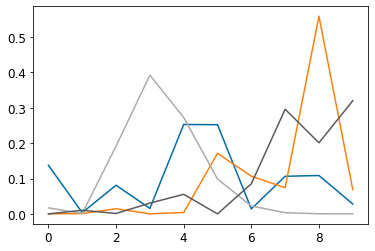

In [21]:
sites = [i for i in range(10)]
pl.plot(sites, toymod["data/occup"][60])
pl.plot(sites, toymod["data/occup"][30])
pl.plot(sites, toymod["data/occup"][10])
pl.plot(sites, toymod["data/occup"][20])

In [12]:
list(chain_coeff["2000.0/1.0"].keys())
print(chain_coeff["2000.0/2.0/c"][()])
list(chain_coeff["2000.0/2.0/t"])

0.46065886596178074


[0.24367008165136503,
 0.2465439160674058,
 0.24795478868354134,
 0.24868721474295313,
 0.24909378199697457,
 0.2493399585116368,
 0.24950013242550662,
 0.2496105102818235,
 0.24969025876653497,
 0.2497502822281343,
 0.249797179435281,
 0.2498351720344085,
 0.24986711058460603,
 0.24989503162469592,
 0.2499204832940156,
 0.24994472571721438,
 0.24996886071974184,
 0.24999392000269427,
 0.2500209275744485]

# Double chain results $\beta = 2.0$

In [92]:

# path to work from personal computer

# Results for alpha_lit=0.01
res = h5py.File(path+"fermions/results/8PGKy/dat_8PGKy.jld", "r")["data"]
info = open(path+"fermions/results/8PGKy/info.txt", "r")
data = info.read()
print(data)

	 name : Anderson impurity problem
	 machine : local
	 method : DTDVP
	 dt = 0.5
	 tmax = 30.0
	 parameters : N = 20.0, ϵd = 0.3, β = 2.0, c1 = 0.46065886596178063, c2 = 0.4606588659617807, 
	 observables : chain1_filled_occup, chain2_empty_occup, system_occup, 
	 convparams : 0.001
	 options : Dlim = 100, savebonddims = true, verbose = false, 



In [121]:
N = 20
epsd = -0.4
beta = 2.0

times = ["0", "7.5", "15", "22.5", "30"]
tim = ["0", "20", "40", "60"]
chain_fol = ["0", "10", "20", "30", "40"]

occ = np.column_stack((res["chain1_filled_occup"][()], res["system_occup"][()]))
occ = np.concatenate((occ.T, res["chain2_empty_occup"][()].T))


list(res.keys())

['bonddims',
 'chain1_filled_occup',
 'chain2_empty_occup',
 'system_occup',
 'times']

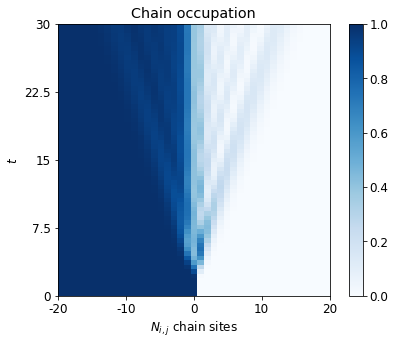

In [122]:
occupation(occ, times, chain)

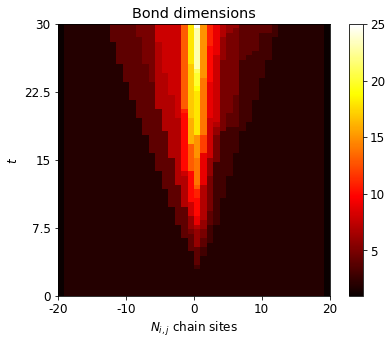

In [123]:
bonddim(res["bonddims"][()], times, chain)

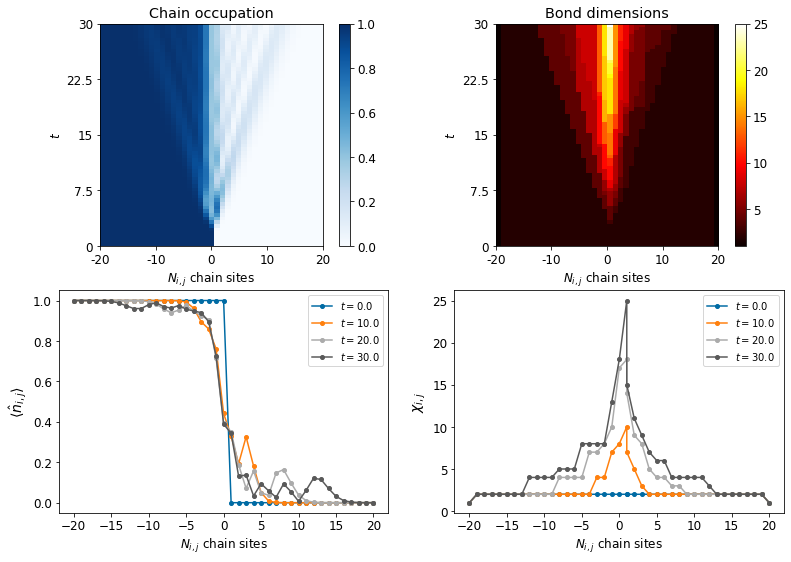

In [124]:
alltogether(occ, res["bonddims"][()], times, tim, chain, True)

# Folded chain results $\beta = 2.0$


In [125]:
res_fol = h5py.File(path+"fermionsnn/results/6opEp/dat_6opEp.jld", "r")["data"]
info_fol = open(path+"fermionsnn/results/6opEp/info.txt", "r")
data_fol = info_fol.read()
print(data_fol)

	 name : Anderson impurity problem (folded chain)
	 machine : local
	 method : DTDVP
	 dt = 0.5
	 tmax = 30.0
	 parameters : N = 20.0, ϵd = 0.3, β = 2.0, c1 = 0.46065886596178063, c2 = 0.4606588659617807, 
	 observables : system_occup, folded_chain_occup, 
	 convparams : 0.001
	 options : Dlim = 100, savebonddims = true, verbose = false, 



In [126]:
occ_fol = np.column_stack((res_fol["system_occup"][()], res_fol["folded_chain_occup"][()]))

list(res_fol.keys())

['bonddims', 'folded_chain_occup', 'system_occup', 'times']

## The occupation measures the number of electrons or holes on each site:

The following cell can be executed to switch from filled_by_electrons-unfilled_by_electrons representation to the filled_by_electrons-filled_by_holes representation.

In [106]:
#list(occ_fol)
for i in range(len(occ_fol)):
    for j in range(len(occ_fol[i])):
        #print(j, ")", occ_fol[i,j])
        if j%2!=0: occ_fol[i,j] = 1-occ_fol[i,j]
        #print(occ_fol[i,j])
        #print("#########")

In [107]:
list(occ_fol)

[array([1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
        1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
        0., 1., 0., 1., 0., 1.]),
 array([1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
        1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
        0., 1., 0., 1., 0., 1.]),
 array([1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
        1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
        0., 1., 0., 1., 0., 1.]),
 array([9.87016899e-01, 9.99956793e-01, 1.28642239e-02, 1.00000000e+00,
        1.59317112e-04, 1.00000000e+00, 2.71657930e-06, 1.00000000e+00,
        5.01776304e-08, 1.00000000e+00, 9.51754825e-10, 1.00000000e+00,
        1.82758604e-11, 1.00000000e+00, 3.53348392e-13, 1.00000000e+00,
        6.86284001e-15, 1.00000000e+00, 1.31822687e-16, 1.00000000e+00,
        3.31297022e-57, 1.00000000e+00, 5.40670186e-59, 1.00000000e+00,
        8.

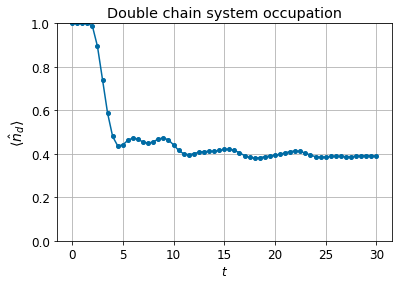

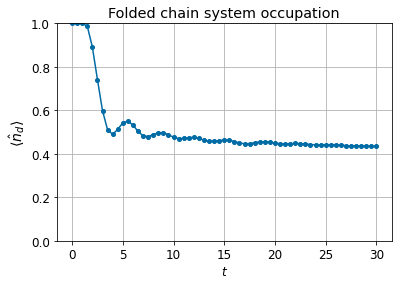

In [127]:
system("Double chain system occupation", res["system_occup"], res["times"])
system("Folded chain system occupation", res_fol["system_occup"], res_fol["times"])

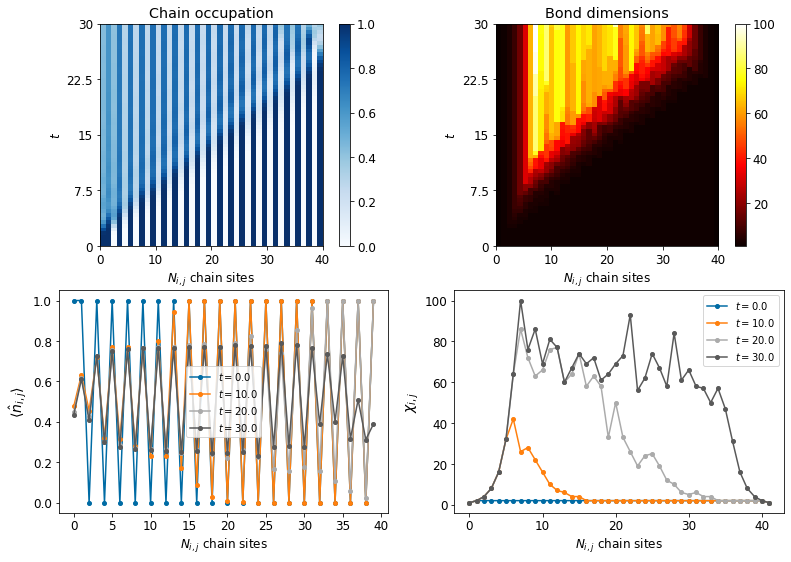

In [128]:
alltogether(occ_fol, res_fol["bonddims"][()], times, tim, chain_fol, False)

# Results at low temperature, $\beta = 2000.0$



In [129]:
res_cold = h5py.File(path+"fermions/results/fCqyn/dat_fCqyn.jld", "r")["data"]
info_cold = open(path+"fermions/results/fCqyn/info.txt", "r")
data_cold = info_cold.read()
print(data_cold)

	 name : Anderson impurity problem
	 machine : local
	 method : DTDVP
	 dt = 0.5
	 tmax = 30.0
	 parameters : N = 20.0, ϵd = 0.3, β = 2000.0, c1 = 0.4606588659617806, c2 = 0.46065886596178074, 
	 observables : chain1_filled_occup, chain2_empty_occup, system_occup, 
	 convparams : 1.0e-6
	 options : Dlim = 100, savebonddims = true, verbose = false, 



In [130]:
occ_cold = np.column_stack((res_cold["chain1_filled_occup"][()], res_cold["system_occup"][()]))
occ_cold = np.concatenate((occ_cold.T, res_cold["chain2_empty_occup"][()].T))

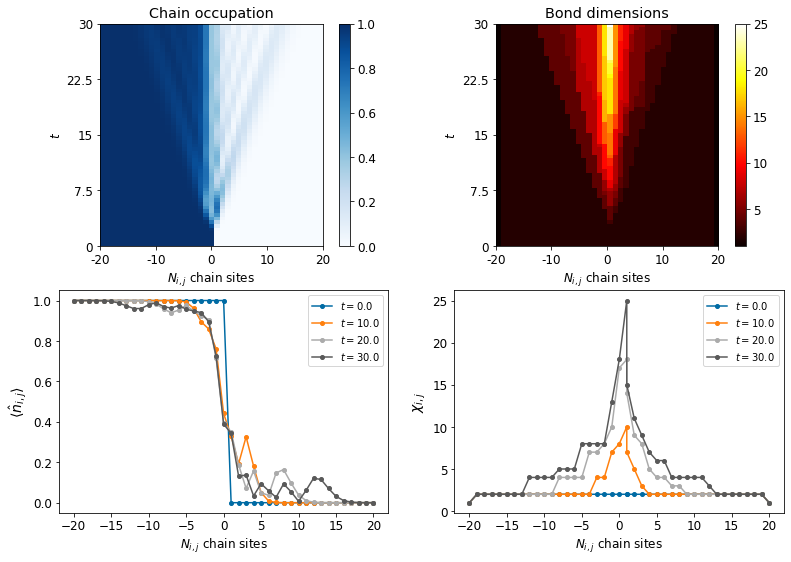

In [131]:
alltogether(occ_cold, res_cold["bonddims"][()], times, tim, chain, True)

In [119]:
res_fol_cold = h5py.File(path+"fermionsnn/results/mKBL7/dat_mKBL7.jld", "r")["data"]
info_fol_cold = open(path+"fermionsnn/results/mKBL7/info.txt", "r")
data_fol_cold = info_fol_cold.read()
print(data_fol_cold)

	 name : Anderson impurity problem (folded chain)
	 machine : local
	 method : DTDVP
	 dt = 0.5
	 tmax = 30.0
	 parameters : N = 20.0, ϵd = 0.3, β = 2000.0, c1 = 0.4606588659617806, c2 = 0.46065886596178074, 
	 observables : system_occup, folded_chain_occup, 
	 convparams : 1.0e-6
	 options : Dlim = 100, savebonddims = true, verbose = false, 



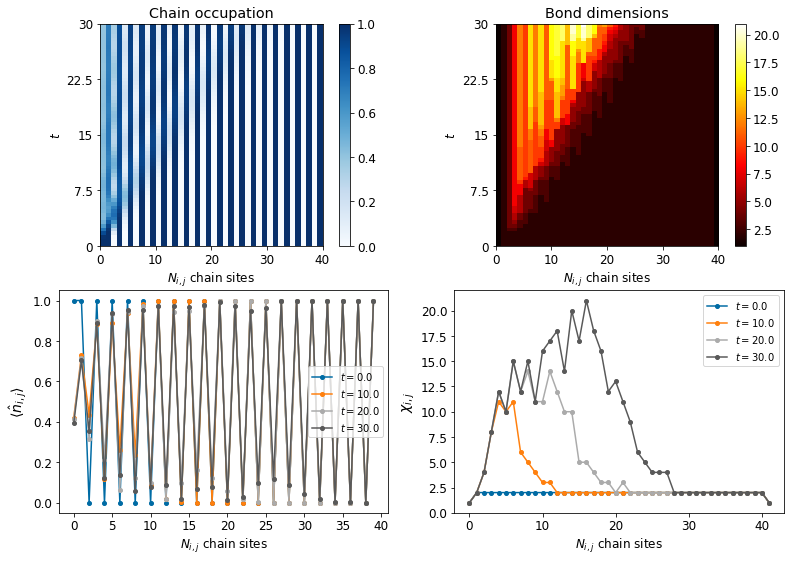

In [134]:
occ_fol_cold = np.column_stack((res_fol_cold["system_occup"][()], res_fol_cold["folded_chain_occup"][()]))

alltogether(occ_fol_cold, res_fol_cold["bonddims"][()], times, tim, chain_fol, False)

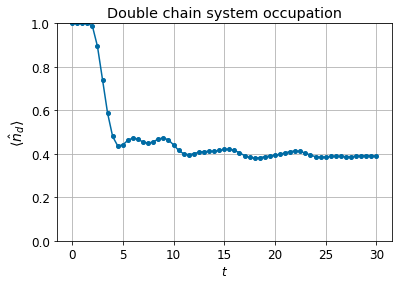

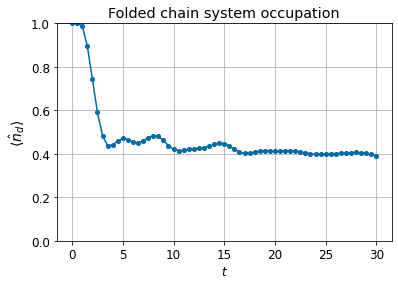

In [135]:
system("Double chain system occupation", res_cold["system_occup"], res_cold["times"])
system("Folded chain system occupation", res_fol_cold["system_occup"], res_fol_cold["times"])